## **BANK CUSTOMER CHURN ANALYSIS**

**PROBLEM STATEMENT:**

Customer churn, also known as customer attrition, customer turnover, or customer defection, is the loss of customers or clients. It poses a significant challenge for banks in maintaining sustainable growth. In this project, we aim to analyze customer data from a bank, including factors such as credit score, geography, gender, age, tenure, balance, number of products, credit card ownership, activity status, and estimated salary. Through exploratory data analysis, our objective is to uncover insights into the factors influencing customer churn behavior. By understanding the relationships and patterns within the data, we seek to provide actionable recommendations for improving customer retention strategies and reducing churn rates.

**DATASET:**
- This dataset contains information about a specific U.S. bank customer, including whether or not they plan to leave the bank.
- Tha data (Bank Customer Churn Prediction) is aquired from: https://www.kaggle.com/datasets




## **1. IMPORTING LIBRARIES:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **2. READING AND UNDERSTANDING THE DATASET:**

In [2]:
df = pd.read_csv("Bank_Churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dimension = df.shape
print("Number of rows:", dimension[0])
print("Number of columns:", dimension[1])

Number of rows: 10000
Number of columns: 14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Number of Unique values:

In [5]:
# Number of unique values
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

## **3. EDA:**

### Statistics Summary:

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


MEAN: Give us an idea of the central tendency of the data.

1. The average credit score is around 650.5.
2. The average age is approximately 38.9 years.
3. The average tenure is about 5 years.
4. The average balance is around 76,485.89.
5. The average number of products held by customers is about 1.53.
6. The mean estimated salary is approximately 100,090.24.


STANDARD DEVIATION (std): Measures the dispersion or spread of the data around the mean. A higher standard deviation indicates greater variability in the data.

1. The credit score has a standard deviation of approximately 96.65, suggesting a relatively wide range of credit scores.
2. The age has a standard deviation of about 10.49, indicating some variability in the ages of customers.
3. The balance has a relatively high standard deviation of around 62,397.41, suggesting significant variability in account balances.


MIN AND MAX: 

1.  The minimum credit score is 350, and the maximum credit score is 850.
2.  Youngest customer is 18 years old, while the oldest customer is 92 years old.
3.  Maximum tenure is 10 years.
4.  Maximum balance is 250,898.09.


QUARTILES (25%, 50%, 75%): Divide the data into four equal parts, providing insights into the distribution of the data.

### Missing values:

In [7]:
# Check for missing/null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

The data has no null values.

The below code provides insight into the distribution of the target variable i.e. Exited(customers exited), which is crucial for understanding the class balance or imbalance in a classification problem.

In [8]:
target_variable = df['Exited'].value_counts()

# Display the counts
print("Target Variable:")
print(target_variable)

Target Variable:
Exited
0    7963
1    2037
Name: count, dtype: int64


From this, we can say that the data is imbalanced. 
Approximately, 80% of the data is from non-exited customers and 20% of the data is from exited customers.


### Creating categories column:

In [9]:
# Number of unique values in the 'Tenure' 
df['Tenure'].nunique()

11

In [10]:
# Count of each unique value in the 'Tenure'
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [11]:
# creates categories (bins) for the Tenure where each category represents a range of tenures

labels=["{0} - {1}".format(i,i+2) for i in range(1,11,2)]
df['Tenure_grp']=pd.cut(df['Tenure'],range(1,12,2),right=False,labels=labels)

In [12]:
df['Tenure_grp'].value_counts()

Tenure_grp
1 - 3     2083
7 - 9     2053
3 - 5     1998
5 - 7     1979
9 - 11    1474
Name: count, dtype: int64

In [13]:
# creates bins for the age group

labels=["{0} - {1}".format(i,i+5) for i in range(18,93,5)]
df['Age_grp']=pd.cut(df['Age'],range(18,94,5),right=False,labels=labels)

In [14]:
df['Age_grp'].value_counts()

Age_grp
33 - 38    2297
38 - 43    2019
28 - 33    1770
43 - 48    1184
23 - 28     794
48 - 53     670
53 - 58     385
58 - 63     296
18 - 23     226
63 - 68     167
68 - 73     107
73 - 78      61
78 - 83      17
83 - 88       4
88 - 93       3
Name: count, dtype: int64

Created new columns for tenure and age where both are categorically grouped.

### Removing irrelevant columns:

In [15]:
df.drop(['RowNumber','CustomerId','Surname','Tenure','Age'],inplace=True,axis=1)

In [16]:
df.head()

,CreditScore,Geography,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tenure_grp,Age_grp
0,619,France,Female,0.00,1,1,1,101348.88,1,1 - 3,38 - 43
1,608,Spain,Female,83807.86,1,0,1,112542.58,0,1 - 3,38 - 43
2,502,France,Female,159660.80,3,1,0,113931.57,1,7 - 9,38 - 43
3,699,France,Female,0.00,2,0,0,93826.63,0,1 - 3,38 - 43
4,850,Spain,Female,125510.82,1,1,1,79084.10,0,1 - 3,43 - 48


### VISUALIZATIONS:

### BIVARIATE ANALYSIS: 

### A) Countplot: 

The distribution of various categorical variables in the DataFrame df is visualized using numerous countplots, and the variation in the exit status ('Exited') among these categorical variables is examined. It is simple to compare several variables because each countplot is shown in its own figure.

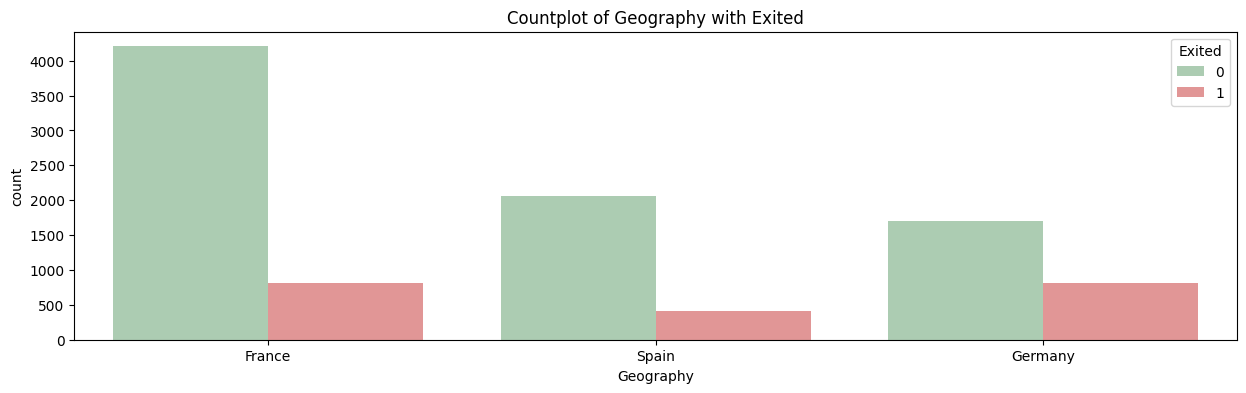

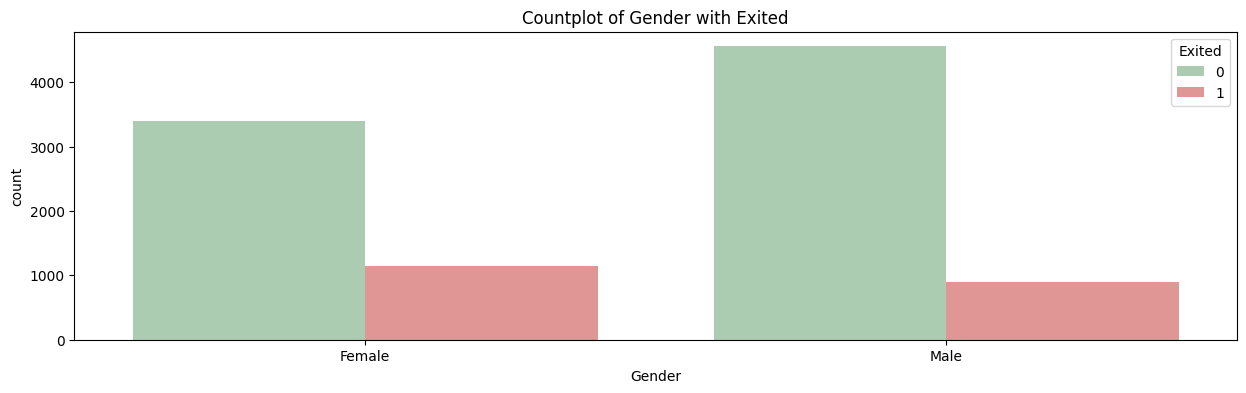

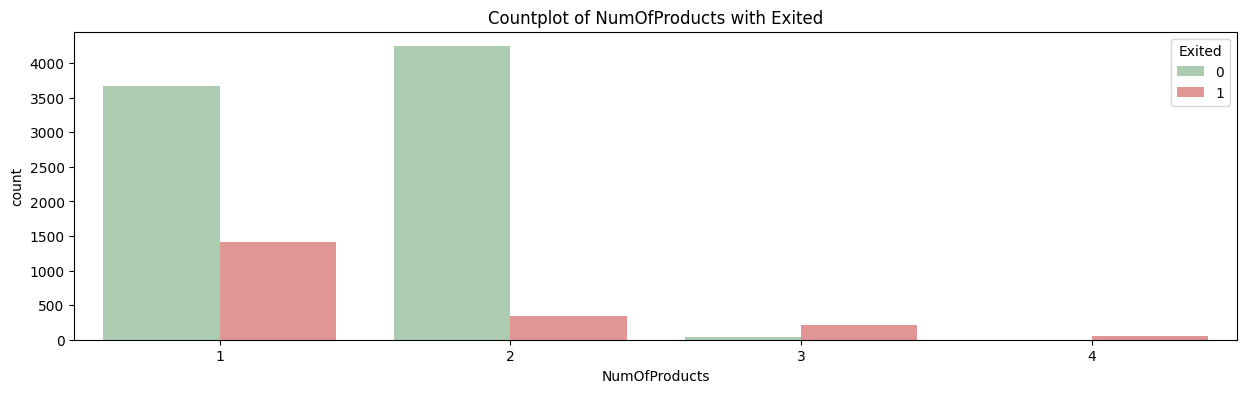

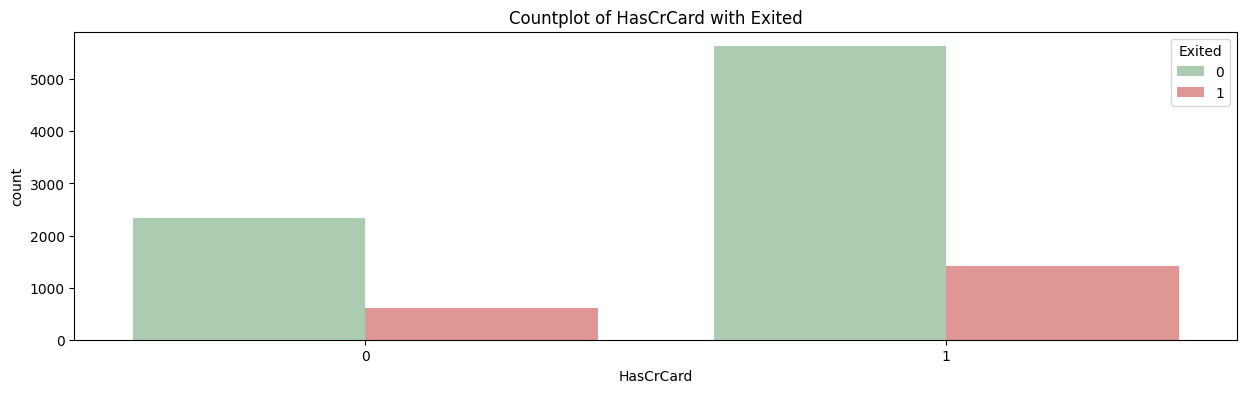

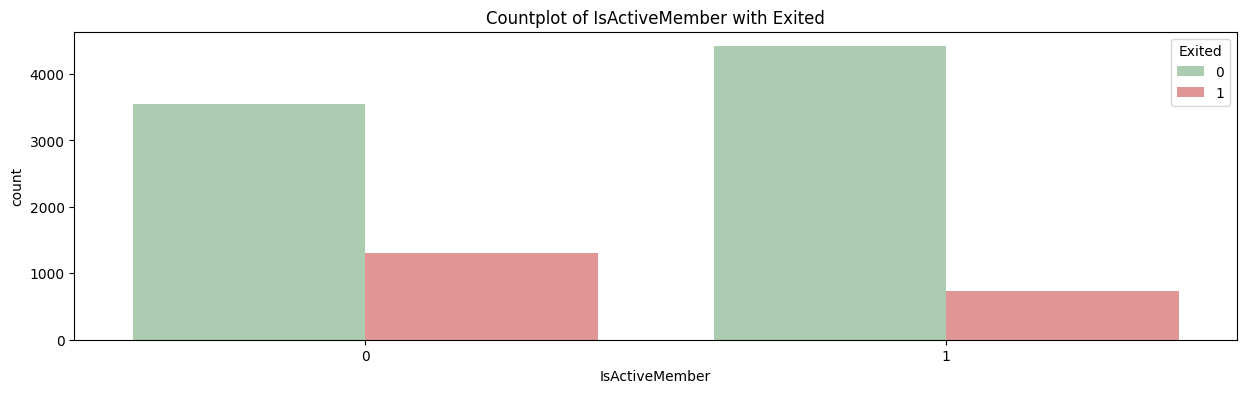

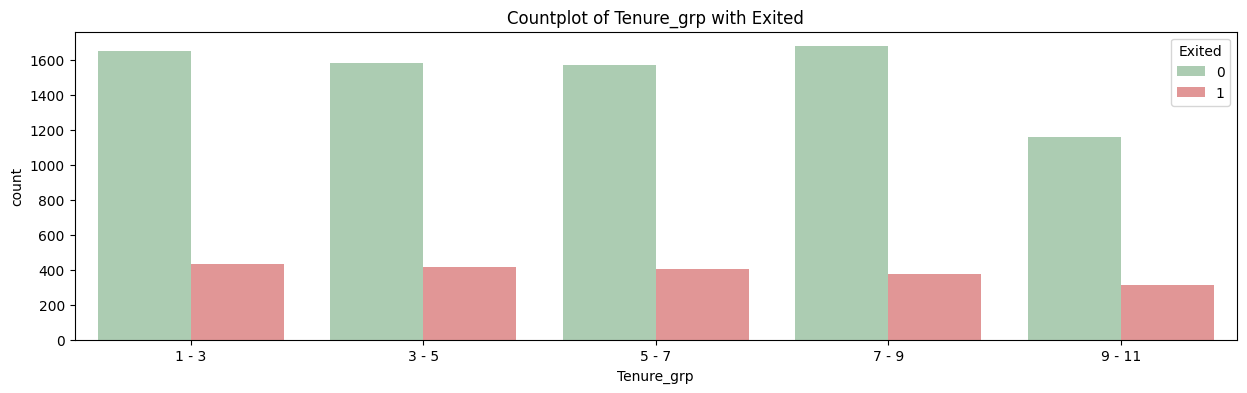

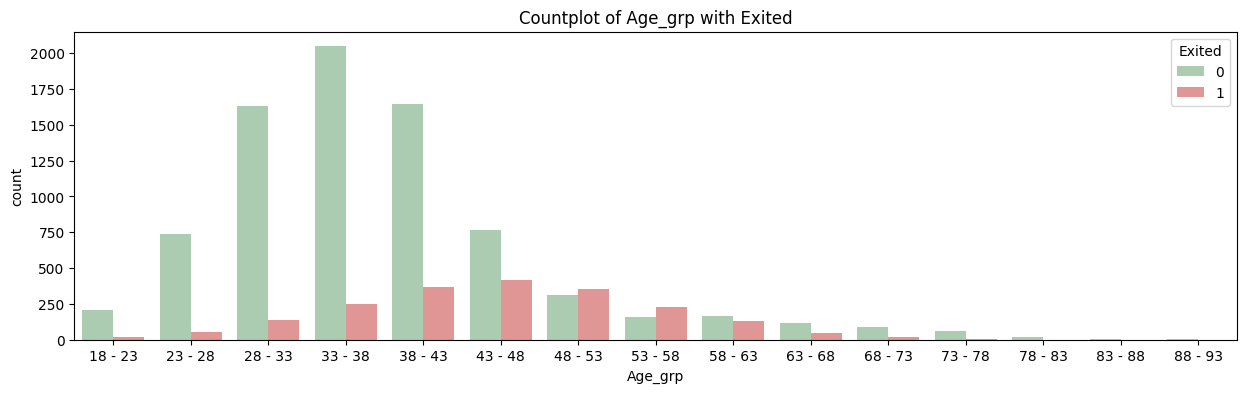

In [17]:
my_palette = ["#a7d1ae", "#ed8a8a"]  

# Iterate over each column in the DataFrame except 'Exited', 'Balance', 'EstimatedSalary', and 'CreditScore'
for idx, pred in enumerate(df.drop(columns=['Exited', 'Balance', 'EstimatedSalary', 'CreditScore'])):
    plt.figure(idx, figsize=(15, 4))
    
    # Use sns.countplot() to create the countplot
    sns.countplot(data=df, x=pred, hue='Exited', palette=my_palette)
    
    # Add a title
    plt.title(f'Countplot of {pred} with Exited')
    
    # Show the plot
    plt.show()

**OBSERVATIONS:**

1. Geography does not seem to have an appropiate relation to the churn. 
2. Females are bit more likey to exit as compared to males.
3. People having 1 product are more likely to exit.
4. People having credit card are more likely to exit.
5. To the obvious point, inactive members are more likely to exit.
6. All tenure grps have similar likilihood of exiting.
7. People of age between 38 and 53 have very high chance of exiting

### B) KDE plot:

A KDE plot of estimated salary and Credit Score in which the color of the KDE curve indicates whether or not consumers left. This makes it possible to see how the distribution of projected incomes and scores differs between clients who left and those who stayed.

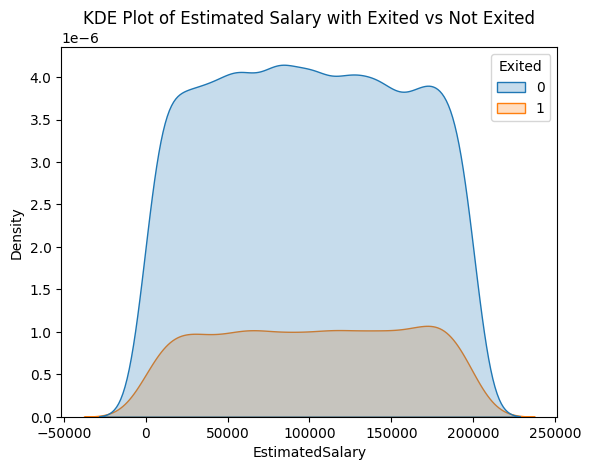

In [18]:
color_palette = ["#a7d1ae", "#ed8a8a"] 

# Use sns.kdeplot() to create the KDE plot
sns.kdeplot(x=df['EstimatedSalary'], hue=df['Exited'], color=color_palette, fill=True)

# Add a title
plt.title('KDE Plot of Estimated Salary with Exited vs Not Exited')

# Show the plot
plt.show()


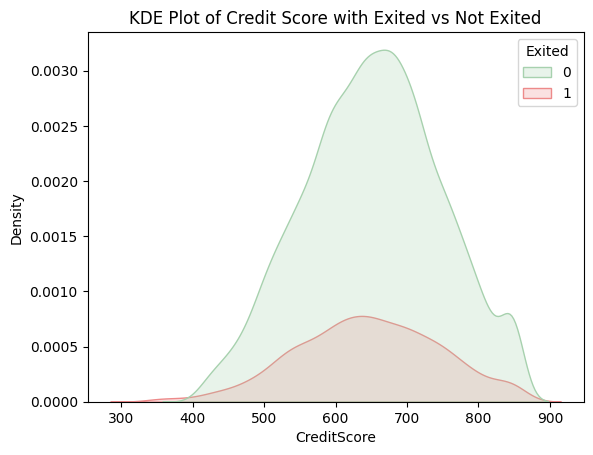

In [19]:
color_palett = ["#a7d1ae", "#ed8a8a"]  

# Use sns.kdeplot() to create the KDE plot
sns.kdeplot(x=df['CreditScore'], hue=df['Exited'], palette=color_palett, fill=True)

# Add a title
plt.title('KDE Plot of Credit Score with Exited vs Not Exited')

# Show the plot
plt.show()

### C) Scatter Plot:

A scatter plot of 'CreditScore' against 'EstimatedSalary' and overlays a linear regression line on the plot. 

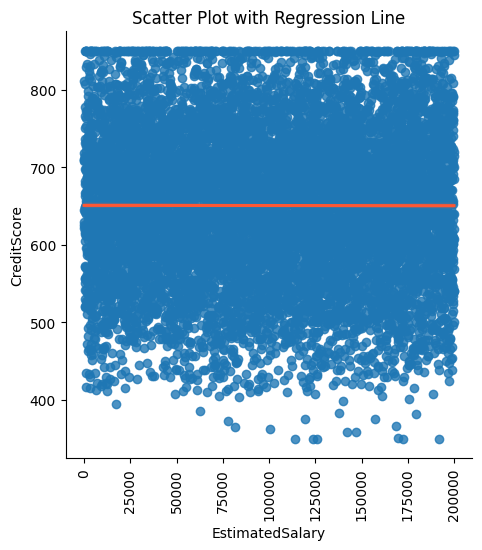

In [20]:
line_color = "#FF5733"  

# Use sns.lmplot() to create the scatter plot with a regression line
sns.lmplot(data=df, y='CreditScore', x='EstimatedSalary', line_kws={'color': line_color})

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Add a title
plt.title('Scatter Plot with Regression Line')

# Show the plot
plt.show()

A scatter plot of 'EstimatedSalary' against 'Balance' and overlays a linear regression line on the plot. 

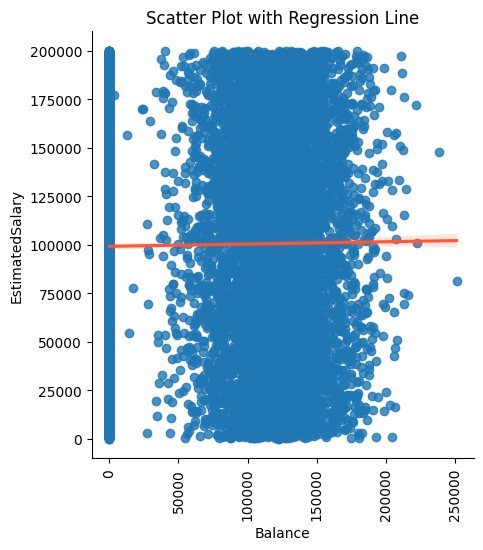

In [21]:
line_color = "#FF5733"  

sns.lmplot(data=df,x='Balance',y='EstimatedSalary', line_kws={'color': line_color})
plt.title('Scatter Plot with Regression Line')
plt.xticks(rotation=90)
plt.show()

A scatter plot of 'CreditScore' against 'Balance' and overlays a linear regression line on the plot.

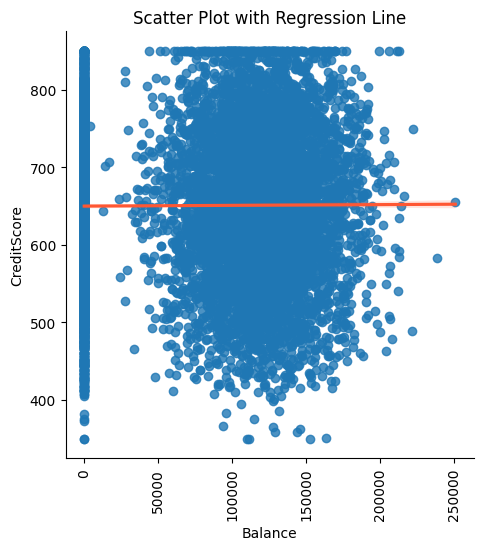

In [22]:
line_color = "#FF5733"  

sns.lmplot(data=df,y='CreditScore',x='Balance', line_kws={'color': line_color})
plt.title('Scatter Plot with Regression Line')
plt.xticks(rotation=90)
plt.show()

**OBSERVATION:** 

For the above visualizations there is no linear relation present between CreditScore, ExtimatedSalary, and Balance.

### D) Correlation

A visual representation of the relationships between the dataset's 'Exited' column and other numerical attributes, which may be used to find potential indicators of customer churn. 
Larger feature values are linked to a larger chance of customer loss, according to positive correlations; negative correlations show the opposite. 
Interpreting the direction and intensity of the connections is made easier by the horizontal line at y=0.

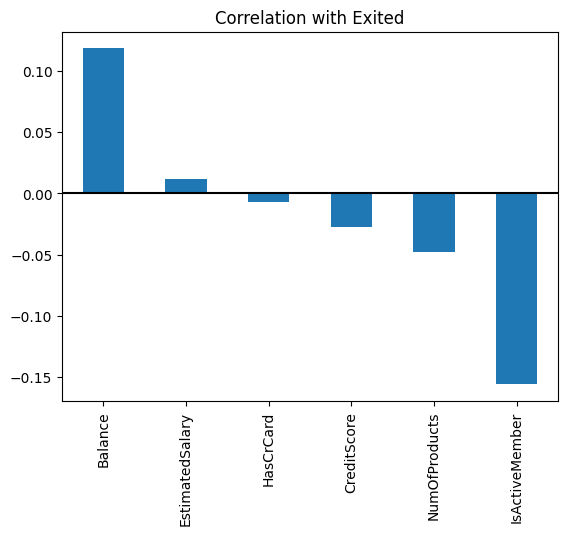

In [23]:
df.corr(numeric_only=True)['Exited'].sort_values(ascending=False)[1:].plot(kind='bar',title='Correlation with Exited')
plt.axhline(y = 0,color='black', linestyle = '-')


**OBSERVATION:**

- There is a positive correlation only with Balance and Estimated salary.
- People having large balance are more likely to exit whereas obviously Active memebers are least likely to exit.

### E) CountPlot:

In [24]:
df_exited = df[df['Exited']>0]

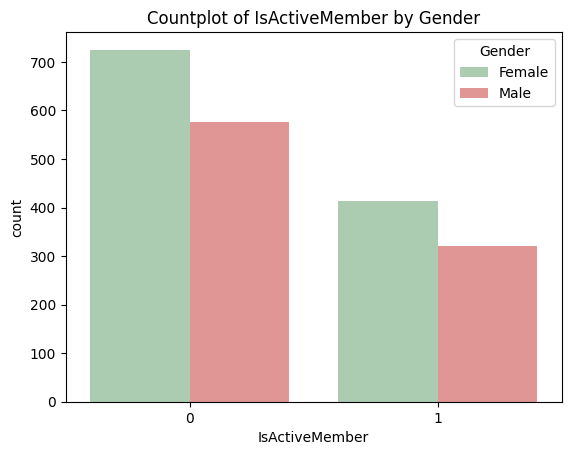

In [25]:
custom_palette = ["#a7d1ae", "#ed8a8a"]  # Example colors: orange and green

# Use sns.countplot() to create the countplot
sns.countplot(x=df_exited['IsActiveMember'], hue=df_exited['Gender'], palette=custom_palette)

# Add a title
plt.title('Countplot of IsActiveMember by Gender')

# Show the plot
plt.show()

**OBSERVATION:** 

It can be observed that in both active and inactive members females are more likely to exit than male members.

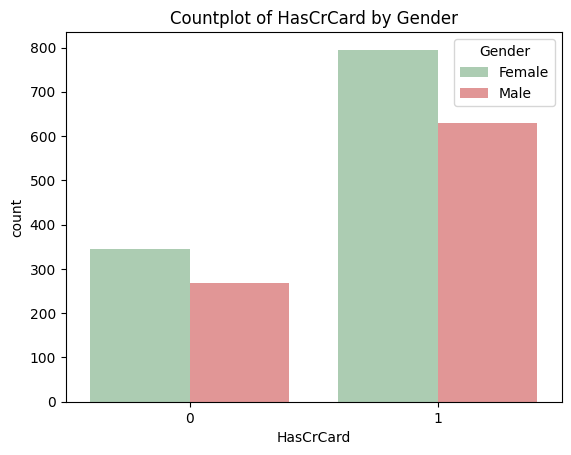

In [26]:
custom_palette = ["#a7d1ae", "#ed8a8a"]  # Example colors: orange and green

# Use sns.countplot() to create the countplot
sns.countplot(x=df_exited['HasCrCard'], hue=df_exited['Gender'], palette=custom_palette)

# Add a title
plt.title('Countplot of HasCrCard by Gender')

# Show the plot
plt.show()

**OBSERVATION:** 

In the previous case females are more likely to exit whether they have credit card or not. But, it also shows that prople having credit card are more likey to exit

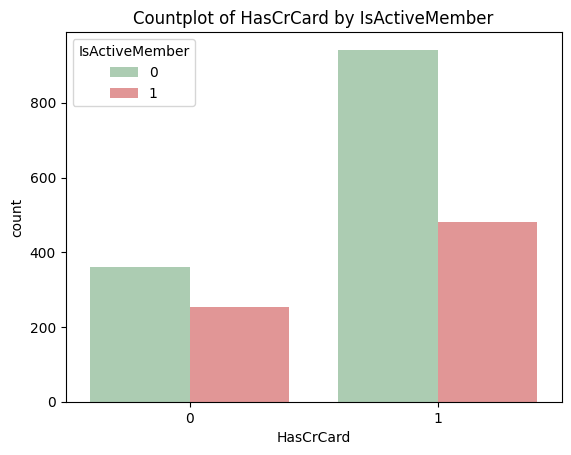

In [27]:
custom_palette = ["#a7d1ae", "#ed8a8a"]  # Example colors: orange and green

# Use sns.countplot() to create the countplot
sns.countplot(x=df_exited['HasCrCard'], hue=df_exited['IsActiveMember'], palette=custom_palette)

# Add a title
plt.title('Countplot of HasCrCard by IsActiveMember')

# Show the plot
plt.show()

**OBSERVATION:** 

Customer having a credit card are more active and also most likely to exit.

### **4. MULTIVARIATE ANALYSIS:** 

### Heatmap

- A heatmap is a graphical representation of data where values in a matrix are represented as colors. It is a way to visualize data in a two-dimensional format, where the values of each cell in the matrix are represented by colors, making it easy to identify patterns and trends within the data.
- The larger the number and darker the color, the higher the correlation between the two variables. 

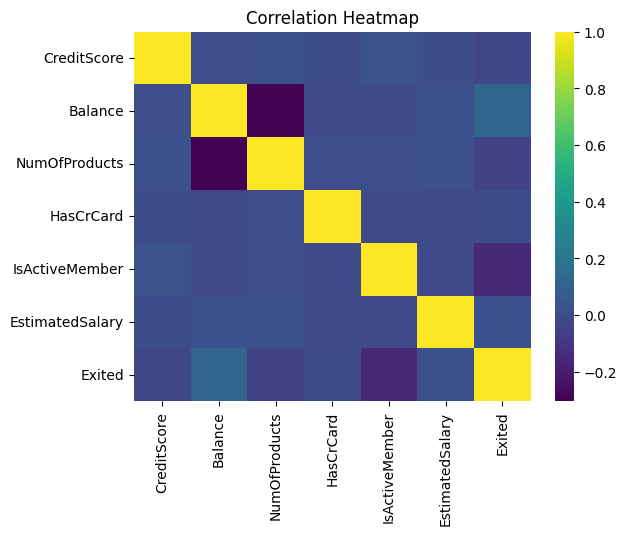

In [28]:
custom_palette = "viridis"
sns.heatmap(df.corr(numeric_only=True), cmap=custom_palette)

# Show the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

### EDA Conclusion :

- The observations from the analysis provide valuable insights into the factors influencing customer churn in the bank.

1. **Geography:** It does not seem to be a significant factor, gender, product engagement, and customer activity play an important role.
2. **Gender:** Women are slightly more likely to leave than men which could indicate possible gender-related factors affecting churn. This may include financial need, communication preferences, or overall satisfaction with the bank’s services.
3. **Number of Products and Credit Card Usage:** Customers with only one product and those with credit cards are more likely to exit. Limited customer engagement with bank products or services may increase churn rates, possibly due to product diversification or dissatisfaction with credit card terms.
4. **Active Membership:** Inactive members are more likely to exit is expected, as active engagement with the bank is often associated with higher customer satisfaction and loyalty.
5. **Tenure:** Customer loyalty does not increase with tenure. It suggests that customer satisfaction and retention efforts need to improve at each stage along the cycle of customer lifetimes.
6. **Age:** Customers aged 38-53 are more likely to exit their banking services due to life changes like career transitions, family obligations, or financial planning.
7. **Credit Score, Estimated Salary, and Balance:** We found an absence of a direct connection between these variables and churn. It shows that the usual signs of wealth might not always predict if someone will stick with their bank.. Other non-financial factors such as customer service quality, product offerings, or personal circumstances may have a stronger influence on churn.
8. **Correlation with Balance and Estimated Salary:** There is a positive correlation between high balance and estimated salary with churn. When people have more money in their bank accounts and earn higher salaries, they might be more likely to switch to a different bank. This could happen because they're not happy with their current bank's services, want to find better ways to invest their money, or have different financial goals.
9. **Intersection of Gender and Credit Card Usage:** Women tend to churn more often, no matter how much they use their credit cards. This shows that there might be different reasons why women leave, apart from the benefits of using credit cards. It's important to figure out what these reasons are and find ways to solve them to keep more women as customers.


All in all, customer churn at the bank is probably affected by several things like how much customers use products, how active they are, satisfaction level, life stage, and possibly gender-related issues. To stop customers leaving, the bank needs to make them happier, offer better products, deal with any gender-related problems, and use specific ways to keep different types of customers. Also, keeping an eye on how customers behave and what they say can help spot when people might leave, so the bank can try to stop it before it happens.

## **MACHINE LEARNING MODEL:** ##

### Import libraries:

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [30]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Define the features and target variable:

In [31]:
# Define features (X) and target (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

### Preprocessing the features before training the churn prediction model:

It performs one-hot encoding for categorical features and standard scaling for numerical features.

In [32]:
# One-hot encode categorical features
categorical_features = ['Geography', 'Gender', 'Tenure_grp', 'Age_grp']
numeric_features = X.columns.difference(categorical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])


### Split the data:

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### A) LOGISTIC REGRESSION: 

In [34]:
# Create a pipeline for Logistic Regression
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', LogisticRegression(random_state=42))])


In [35]:
# Train the Logistic Regression model
logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Balance', 'CreditScore', 'EstimatedSalary', 'HasCrCard',
       'IsActiveMember', 'NumOfProducts'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  ['Geography', 'Gender',
                                                   'Tenure_grp',
                                                   'Age_grp'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [36]:
# Make predictions on the test set with Logistic Regression
y_pred_log = logistic_pipeline.predict(X_test)
y_pred_log_proba = logistic_pipeline.predict_proba(X_test)[:, 1]


In [37]:
# Evaluate Logistic Regression
print("Logistic Regression Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
logistic_roc_auc = roc_auc_score(y_test, y_pred_log_proba)
print("ROC AUC Score:", logistic_roc_auc)

Logistic Regression Model Evaluation
Accuracy: 0.8425
Confusion Matrix:
 [[1550   57]
 [ 258  135]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1607
           1       0.70      0.34      0.46       393

    accuracy                           0.84      2000
   macro avg       0.78      0.65      0.68      2000
weighted avg       0.83      0.84      0.82      2000

ROC AUC Score: 0.802546429346165


### Logistic Regression Evaluation: 

1) **Accuracy:**
The model has an accuracy of 84.35%, which indicates that it correctly predicts churn or non-churn for approximately 84.35% of the samples in the test dataset.

2) **Confusion Matrix:**
The confusion matrix provides insights into the model's performance in terms of true positives, true negatives, false positives, and false negatives.
- True Positive (TP): 141 cases were correctly classified as churn (Exited=1).
- True Negative (TN): 1546 cases were correctly classified as non-churn (Exited=0).
- False Positive (FP): 61 cases were incorrectly classified as churn (false alarms).
- False Negative (FN): 252 cases were incorrectly classified as non-churn (missed opportunities).


3) **Classification Report:**
- Precision: The precision for predicting churn (Exited=1) is 70%, indicating that when the model predicts churn, it is correct 70% of the time.
- Recall: The recall (also known as sensitivity) for predicting churn is 36%, indicating that the model correctly identifies 36% of all churn cases in the dataset.
- F1-score: The F1-score, which is the harmonic mean of precision and recall, provides a balance between precision and recall. The weighted average F1-score is 0.82.
- Support: Indicates the number of samples for each class.


4) **ROC AUC Score:**
The ROC AUC (Receiver Operating Characteristic - Area Under the Curve) score is 0.80, which indicates the model's ability to distinguish between churn and non-churn classes. An ROC AUC score closer to 1 indicates better model performance.

### B) RANDOM FOREST: 

In [38]:
# Create a pipeline for Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])


In [39]:
# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Balance', 'CreditScore', 'EstimatedSalary', 'HasCrCard',
       'IsActiveMember', 'NumOfProducts'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  ['Geography', 'Gender',
                                                   'Tenure_grp',
                                                   'Age_grp'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [40]:
# Make predictions on the test set with Random Forest
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_rf_proba = rf_pipeline.predict_proba(X_test)[:, 1]  # This line generates predicted probabilities for the positive class

In [41]:
# Evaluate Random Forest
print("Random Forest Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
rf_roc_auc = roc_auc_score(y_test, y_pred_rf_proba)
print("ROC AUC Score:", rf_roc_auc)

Random Forest Model Evaluation
Accuracy: 0.8585
Confusion Matrix:
 [[1547   60]
 [ 223  170]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92      1607
           1       0.74      0.43      0.55       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

ROC AUC Score: 0.8469331851267752


### Random Forest Evaluation: 

1) **Accuracy:**
The model has an accuracy of 86%, which means it correctly predicts churn or non-churn for approximately 86% of the samples in the test dataset.

2) **Confusion Matrix:**
The confusion matrix provides insights into the model's performance in terms of true positives, true negatives, false positives, and false negatives.
- True Positive (TP): 172 cases were correctly classified as churn (Exited=1).
- True Negative (TN): 1548 cases were correctly classified as non-churn (Exited=0).
- False Positive (FP): 59 cases were incorrectly classified as churn (false alarms).
- False Negative (FN): 221 cases were incorrectly classified as non-churn (missed opportunities).


3) **Classification Report:**
- Precision: The precision for predicting churn (Exited=1) is 74%, indicating that when the model predicts churn, it is correct 74% of the time.
- Recall: The recall (also known as sensitivity) for predicting churn is 44%, indicating that the model correctly identifies 44% of all churn cases in the dataset.
- F1-score: The F1-score, which is the harmonic mean of precision and recall, provides a balance between precision and recall. The weighted average F1-score is 0.85.
- Support: Indicates the number of samples for each class.


4) **ROC AUC Score:**
The ROC AUC (Receiver Operating Characteristic - Area Under the Curve) score is 0.84, which indicates the model's ability to distinguish between churn and non-churn classes. An ROC AUC score closer to 1 indicates better model performance.

### Receiver Operating Characteristic (ROC) Curve:

ROC curves plot the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings. It provides a comprehensive view of the trade-off between sensitivity and specificity for different threshold values.

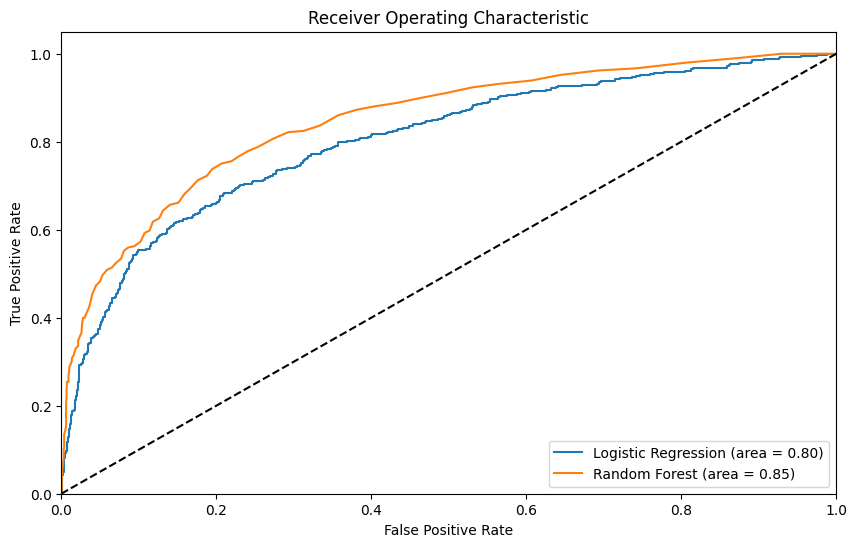

In [42]:
# Plot ROC Curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_log_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression (area = %0.2f)' % logistic_roc_auc)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Comparison Between Logistic Regression and Random Forest:

1. Logistic Regression Model:
- Precision for predicting churn (Exited=1): 70%
- Recall for predicting churn (Exited=1): 36%
- Based on the precision, approximately 70% of the customers predicted to churn by the Logistic Regression model are likely to actually churn.
- However, considering the recall, the model correctly identifies only 36% of all churn cases in the dataset.

2. Random Forest Model:
- Precision for predicting churn (Exited=1): 74%
- Recall for predicting churn (Exited=1): 44%
- Similarly, based on the precision, approximately 74% of the customers predicted to churn by the Random Forest model are likely to actually churn.
- The Random Forest model shows better recall compared to Logistic Regression, correctly identifying 44% of all churn cases in the dataset.

### Conclusion on Models:

Both models predict a proportion of customers to churn, but the exact number depends on factors like the dataset size and model thresholds. The Logistic Regression model has a precision of 70% and a recall of 36%, while the Random Forest model has a precision of 74% and a recall of 44%. This means that both models correctly identify a percentage of churn cases, but the Random Forest model performs slightly better in recall. 
